**TITANIC SURVIVAL PREDICTION**

**IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**IMPORTING DATASET FROM LOCAL DIRECTORY**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Titanic_Survival_Prediction.csv to Titanic_Survival_Prediction.csv


**LOAD DATASET**

In [3]:
dataset = pd.read_csv('Titanic_Survival_Prediction.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.shape

(891, 12)

In [5]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
dataset['Survived'].value_counts()

,count
Survived,
0,549
1,342


**SET UP THE MATPLOTLIB FIGURE**

In [7]:
plt.figure(figsize=(4, 3))

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

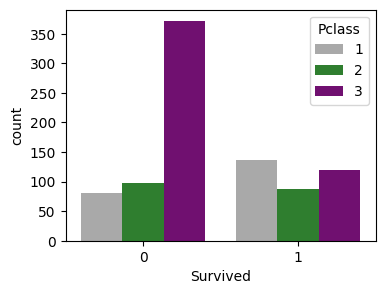

In [8]:
plt.figure(figsize=(4, 3))
custom_colors = ['#A9A9A9', '#228B22', '#800080']
sns.countplot(x=dataset['Survived'], hue=dataset['Pclass'], palette=custom_colors)
plt.show()


In [9]:
dataset['Sex']

,Sex
0,male
1,female
2,female
3,female
4,male
...,...
886,male
887,female
888,female
889,male


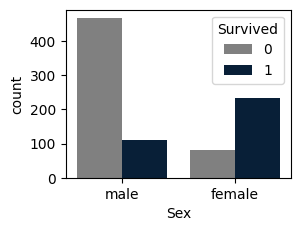

In [10]:
plt.subplot(2, 2, 4)
custom_palette = {
    0: '#808080',
    1: '#001F3F'
}
sns.countplot(x=dataset['Sex'], hue=dataset['Survived'],  dodge=True, palette=custom_palette)
plt.show()

In [11]:
dataset.groupby('Sex')[('Survived')].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [12]:
dataset['Sex'].unique()

array(['male', 'female'], dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
dataset['Sex'] = labelencoder.fit_transform(dataset['Sex'])
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [14]:
dataset['Sex'], dataset['Survived']

(0      1
 1      0
 2      0
 3      0
 4      1
       ..
 886    1
 887    0
 888    0
 889    1
 890    1
 Name: Sex, Length: 891, dtype: int64,
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

**AFTER LABELLING AND ENCODING THE COUNTPLOT FOR SURVIVEL**

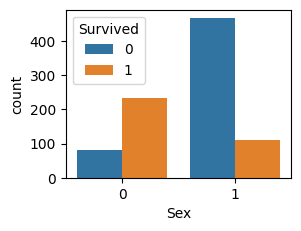

In [15]:
plt.subplot(2,2,4)
sns.countplot(x=dataset['Sex'], hue=dataset['Survived'])
plt.show()

In [16]:
dataset.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**AFTER DROPING NON REQUIRED COLUMN**

In [17]:
dataset=dataset.drop(['Age'],axis=1)
dataset_final=dataset
dataset_final.head(5)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,NaN,S


**TRAIN THE MODEL**

In [18]:
labelencoder = LabelEncoder()
dataset['Sex'] = labelencoder.fit_transform(dataset['Sex'])
dataset['Embarked'] = labelencoder.fit_transform(dataset['Embarked'].fillna('S'))

X=dataset[['Pclass', 'Sex']]
Y=dataset['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LogisticRegression
log=LogisticRegression(random_state = 0, max_iter=1000)
log.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=0)

**MAKE PREDICTIONS ON THE TEST SET**

In [19]:
pred=print(log.predict(X_test))

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [20]:
print(Y_test)

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: int64


In [21]:
import warnings
warnings.filterwarnings('ignore')

res=log.predict([[2,0]])

if(res == 0):
  print("Not Survived")
else:
  print("Survived")

Survived
